Import necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [3]:
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

Upload the datasets

In [4]:
cab = pd.read_csv('Cab_Data.csv')
trans = pd.read_csv('Transaction_ID.csv')
customer = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')

Data preparation

In [5]:
mergedf1 = trans.merge(cab, how='inner')
print('Merged data frame:')
display(mergedf1.head())

Merged data frame:


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
mergedf2 = customer.merge(mergedf1, how='inner')
print('Merged data frame:')
display(mergedf2.head())

Merged data frame:


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [7]:
masterdf = city.merge(mergedf2, how='inner')
print('Master data frame:')
display(masterdf.head())

Master data frame:


,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,8405837,302149,2416,Male,28,21399,10000139,Cash,42377,Pink Cab,17.85,242.90,198.1350
1,NEW YORK NY,8405837,302149,2416,Male,28,21399,10006684,Cash,42405,Yellow Cab,34.34,1099.35,482.1336
2,NEW YORK NY,8405837,302149,2416,Male,28,21399,10015798,Card,42442,Yellow Cab,19.20,559.30,264.9600
3,NEW YORK NY,8405837,302149,2416,Male,28,21399,10074689,Card,42621,Yellow Cab,14.84,322.28,179.8608
4,NEW YORK NY,8405837,302149,2416,Male,28,21399,10078883,Card,42631,Pink Cab,37.08,728.27,393.0480


In [8]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   City                359392 non-null  object 
 1   Population          359392 non-null  int64  
 2   Users               359392 non-null  int64  
 3   Customer ID         359392 non-null  int64  
 4   Gender              359392 non-null  object 
 5   Age                 359392 non-null  int64  
 6   Income (USD/Month)  359392 non-null  int64  
 7   Transaction ID      359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Date of Travel      359392 non-null  int64  
 10  Company             359392 non-null  object 
 11  KM Travelled        359392 non-null  float64
 12  Price Charged       359392 non-null  float64
 13  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 41.1+ MB


Exploratory Data Analysis

Exploring the relationship between the features and outlier detection analysis

In [9]:
# The correlation between numerical variables
correlations = masterdf.corr()
correlations

,Population,Users,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
Population,1.000000,0.915490,-0.647052,-0.009002,0.011868,0.023868,0.022102,-0.002311,0.326589,0.015108
Users,0.915490,1.000000,-0.610742,-0.005906,0.010464,0.013526,0.011780,-0.000428,0.281061,0.023628
Customer ID,-0.647052,-0.610742,1.000000,-0.004735,-0.013608,-0.016912,-0.017653,0.000389,-0.177324,0.003077
Age,-0.009002,-0.005906,-0.004735,1.000000,0.003907,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189
Income (USD/Month),0.011868,0.010464,-0.013608,0.003907,1.000000,-0.001570,-0.001368,-0.000544,0.003228,-0.000633
Transaction ID,0.023868,0.013526,-0.016912,-0.001267,-0.001570,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date of Travel,0.022102,0.011780,-0.017653,-0.001346,-0.001368,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM Travelled,-0.002311,-0.000428,0.000389,-0.000369,-0.000544,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price Charged,0.326589,0.281061,-0.177324,-0.003084,0.003228,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost of Trip,0.015108,0.023628,0.003077,-0.000189,-0.000633,-0.003462,-0.004484,0.981848,0.859812,1.000000


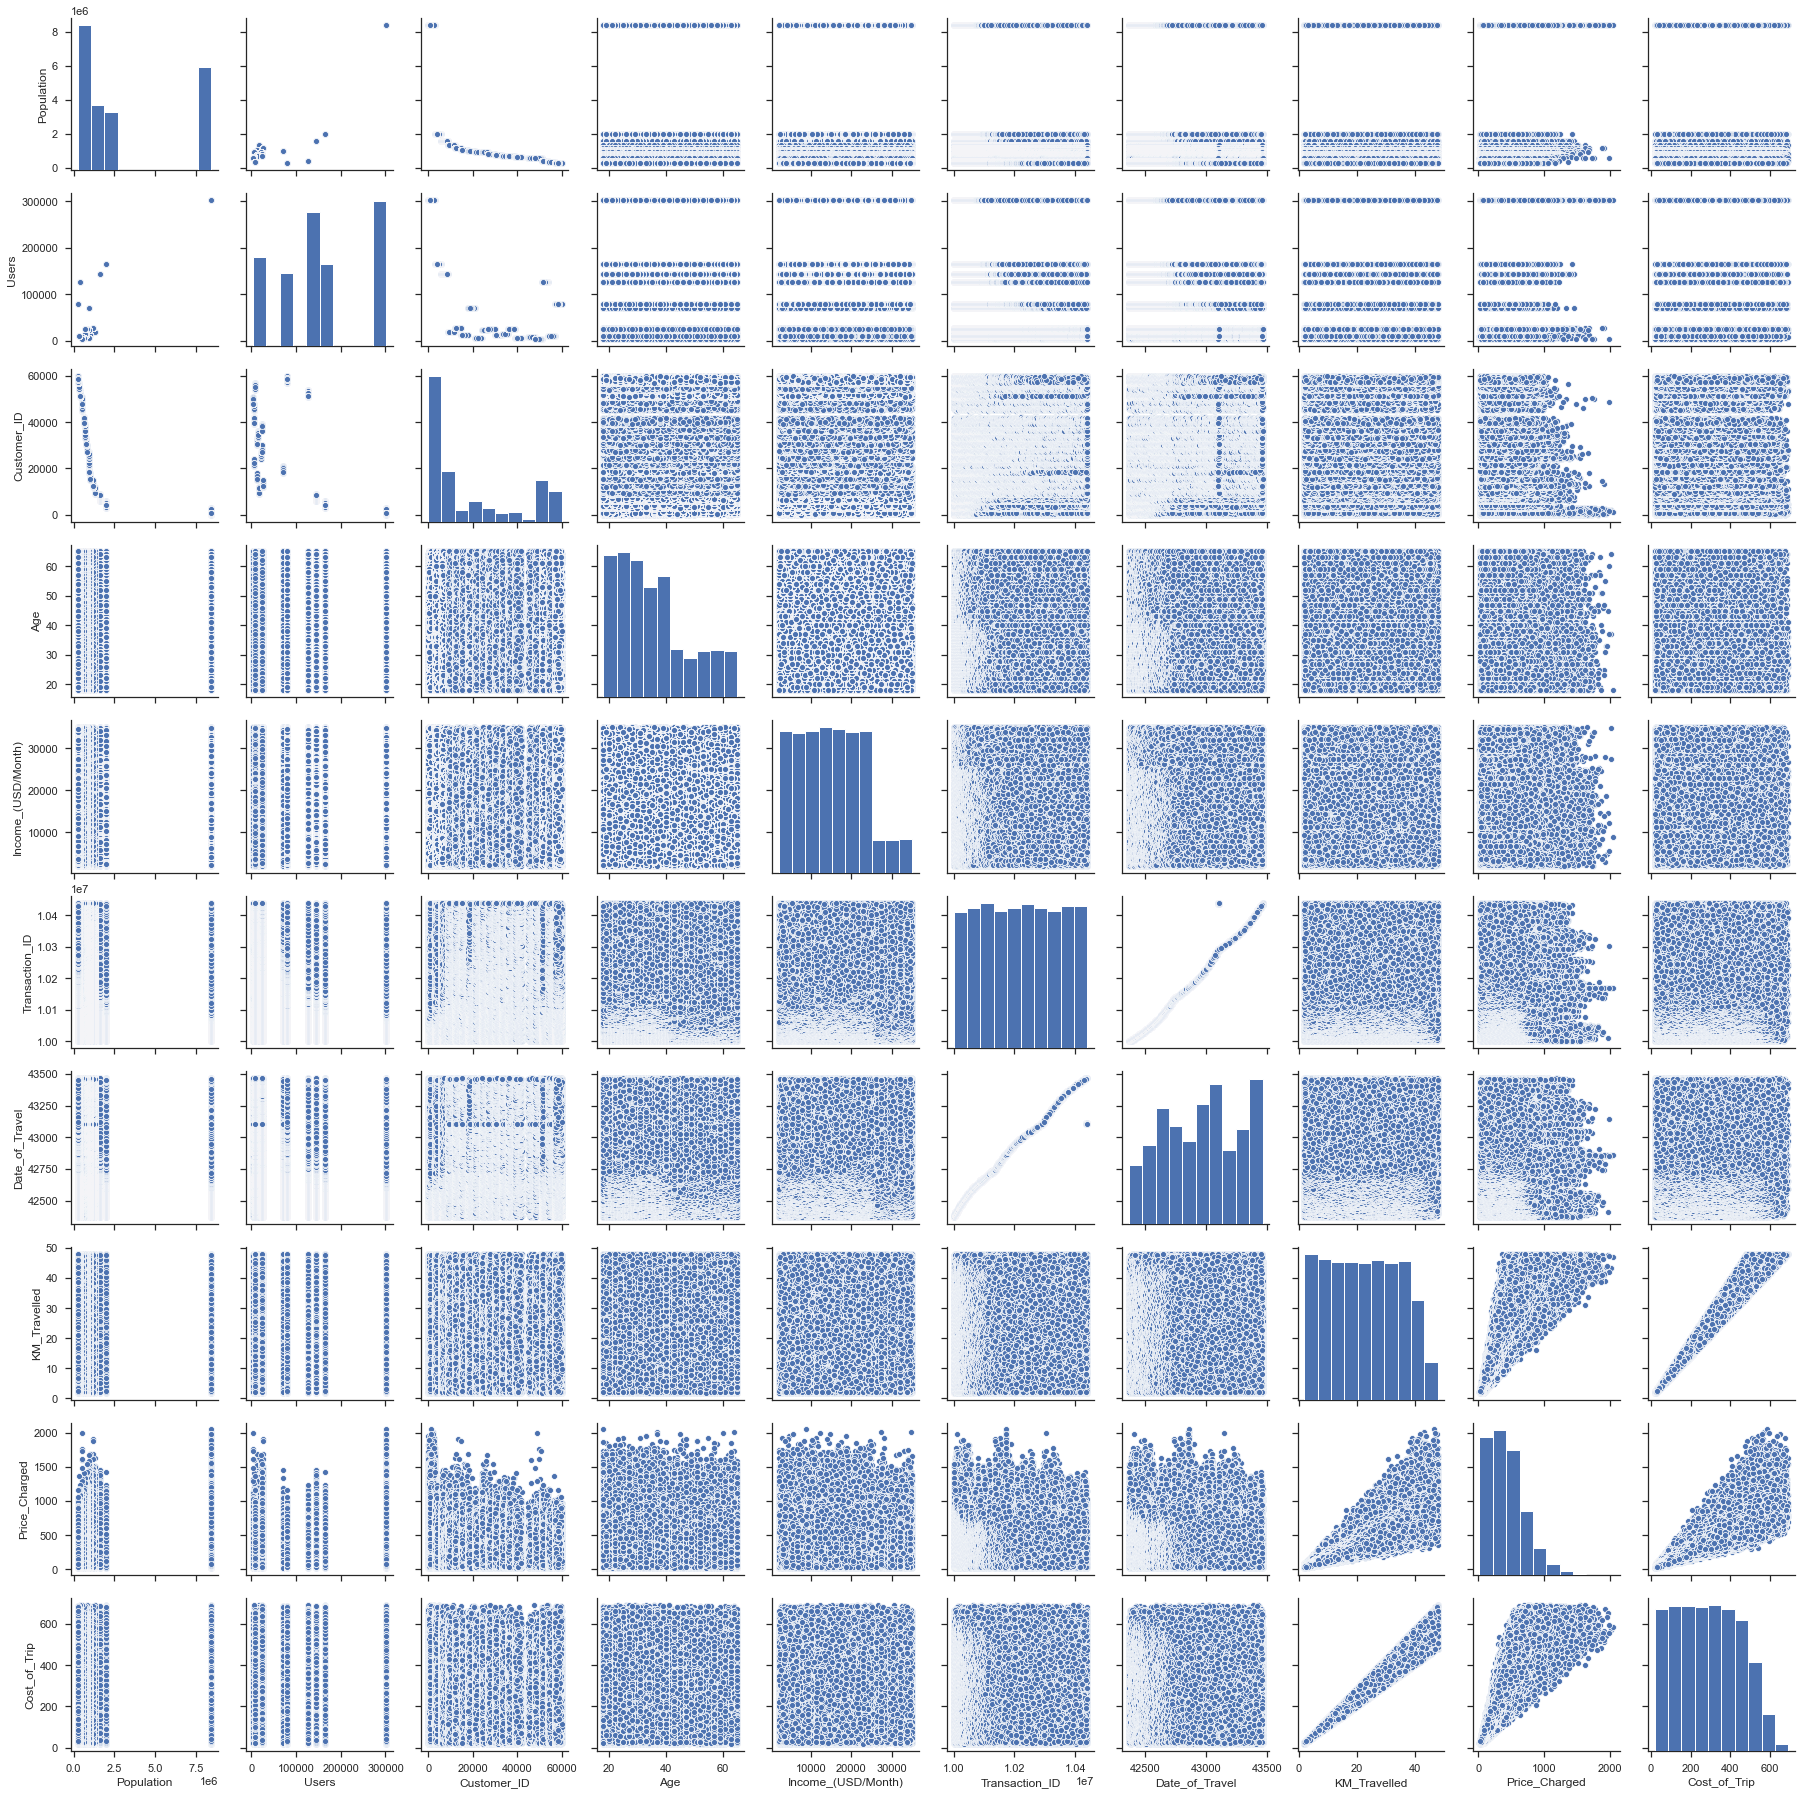

In [143]:
# Pairplot to visualize the correlation between the variables
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(masterdf)

Relationship between catagorical variables

In [10]:
corr_cat2 = pd.crosstab(masterdf['Payment_Mode'],masterdf['Company'])
corr_cat2

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


In [11]:
corr_cat3 = pd.crosstab(masterdf['Gender'],masterdf['Company'])
corr_cat3

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [12]:
corr_cat4 = pd.crosstab(masterdf['City'],masterdf['Company'])
corr_cat4

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169
